In [1]:
import ipyvolume as ipv
import torch
import numpy as np
import os    
import re
import matplotlib.pyplot as plt

Volume number 0 corresponds to the file volume_0_label_29.pt
Number of NaNs: 0
tensor 1.0 0.0


/opt/miniconda3/envs/MLA/lib/python3.11/site-packages/ipyvolume/serialize.py:102: RuntimeWarning: invalid value encountered in cast
  subdata[..., i] = ((gradient[i][zindex] / 2.0 + 0.5) * 255).astype(np.uint8)


Container(children=[VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.5, max=1.0, step…

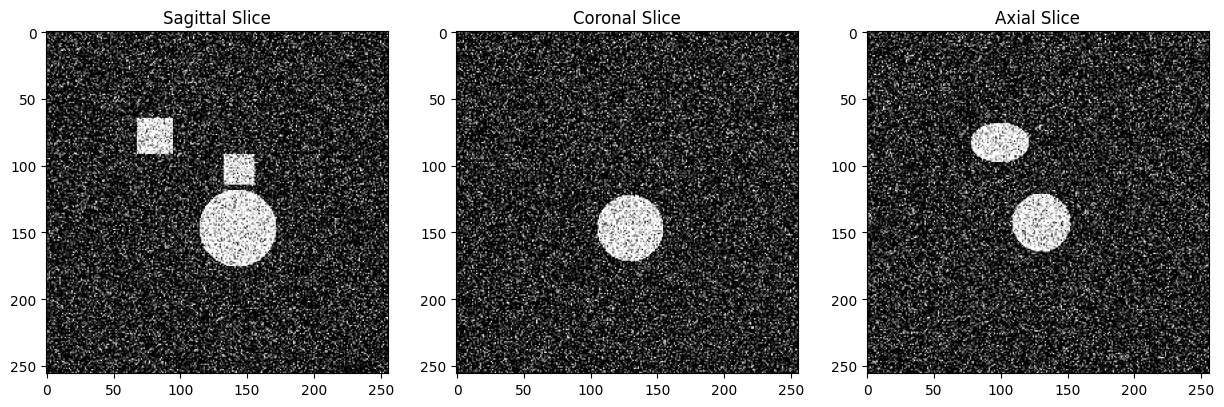

In [2]:


def visualize_3d_tensor(tensor):
    # Ensure the tensor is on the CPU and convert to numpy array if necessary
    if torch.is_tensor(tensor):
        tensor = tensor.cpu().numpy()
    
    # Normalize the data for better visualization
    max_value = tensor.max()
    if max_value > 0:
        tensor = tensor / max_value
    else:
        print("Warning: Max value of tensor is 0. Normalization skipped.")

    # Replace NaNs and infinite values, if any
    print("Number of NaNs:", np.isnan(tensor).sum())
    print("tensor", tensor.max(), tensor.min())
    tensor = np.nan_to_num(tensor, nan=0.0, posinf=1.0, neginf=0.0)

    # Create a 3D volume visualization
    ipv.quickvolshow(tensor, level=0.5, opacity=0.3)
    ipv.show()

# Load the tensor
loaded_tensors = []
def display_volume(volume_number):
    output_dir = '../datasets/artificial_data/3d_shapes'
    
    # Construct the regular expression to match the desired file
    pattern = re.compile(rf'volume_{volume_number}_label_\d+\.pt')
    
    # Search for the file in the output directory
    for filename in os.listdir(output_dir):
        if pattern.match(filename):
            volume_path = os.path.join(output_dir, filename)
            break
    else:
        print(f"No file found for volume number {volume_number}")
        return

    # print label 
    print(f"Volume number {volume_number} corresponds to the file {filename}")
    # Load the tensor
    loaded_tensor = torch.load(volume_path)
    loaded_tensors.append(loaded_tensor)

    # Visualize the tensor (assuming you have a function named visualize_3d_tensor)
    visualize_3d_tensor(loaded_tensor)

def display_slices(loaded_tensor):
        # Visualize the middle slices
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot sagittal slice
    slice_index = loaded_tensor.shape[2] // 2
    slice_tensor = loaded_tensor[:, :, slice_index]
    axes[0].imshow(slice_tensor, cmap='gray')
    axes[0].set_title('Sagittal Slice')

    # Plot coronal slice
    slice_index = loaded_tensor.shape[1] // 2
    slice_tensor = loaded_tensor[:, slice_index, :]
    axes[1].imshow(slice_tensor, cmap='gray')
    axes[1].set_title('Coronal Slice')

    # Plot axial slice
    slice_index = loaded_tensor.shape[0] // 2
    slice_tensor = loaded_tensor[slice_index, :, :]
    axes[2].imshow(slice_tensor, cmap='gray')
    axes[2].set_title('Axial Slice')

    plt.show()

for i in range(1):
    display_volume(i)



# display_volume(1)


for i in range(len(loaded_tensors)):
    display_slices(loaded_tensors[i])


In [3]:

tensor = torch.load('../datasets/artificial_data/3d_shapes/volume_1_label_21.pt')
print("tensor", tensor.max(), tensor.min())
tensor = np.nan_to_num(tensor, nan=0.0, posinf=1.0, neginf=0.0)
ipv.quickvolshow(tensor, level=0.5, opacity=0.3)
ipv.show()

tensor tensor(255, dtype=torch.uint8) tensor(0, dtype=torch.uint8)


Container(children=[VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.5, max=1.0, step…

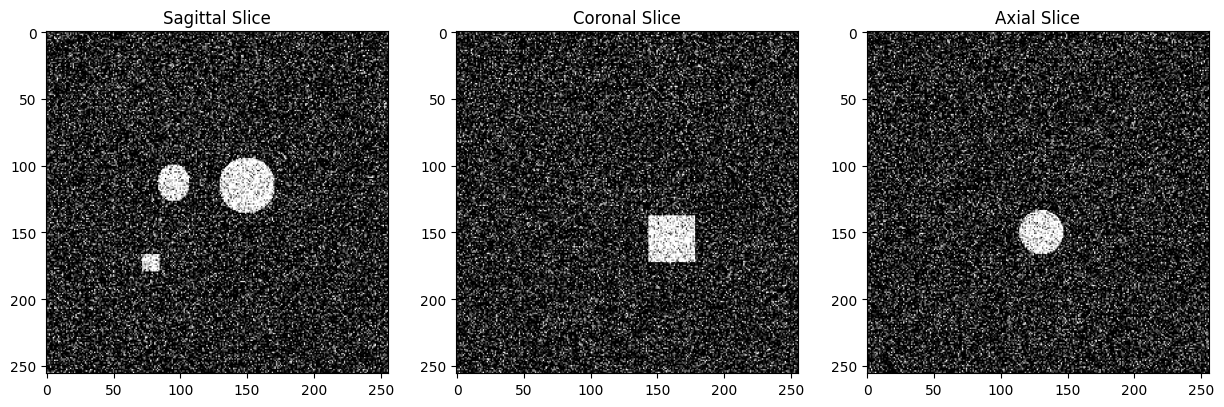

In [4]:
display_slices(tensor)